In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

Davies-Bouldin Index: 0.9384521529981805
Silhouette Score: 0.40077093834633815


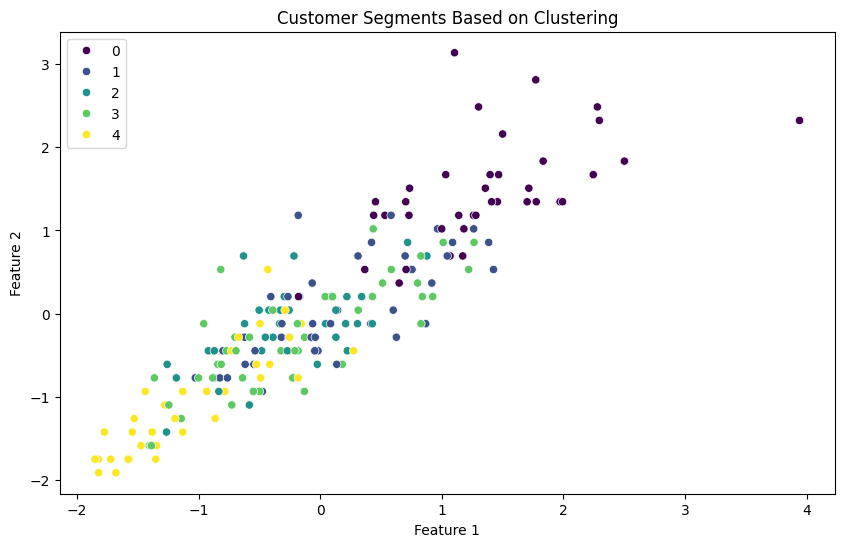

In [3]:
customer_profile = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total transaction value
    'Quantity': 'sum',    # Total quantity purchased
    'ProductID': 'count', # Number of products purchased
    'Region': 'first'     # Region (categorical)
}).rename(columns={
    'TotalValue': 'TotalRevenue',
    'Quantity': 'TotalQuantity',
    'ProductID': 'TotalTransactions'
})

customer_profile = pd.get_dummies(customer_profile, columns=['Region'], drop_first=True)

scaler = StandardScaler()
customer_profile_normalized = scaler.fit_transform(customer_profile)

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(customer_profile_normalized)

grid = customer_profile.copy()
grid['Cluster'] = cluster_labels
db_index = davies_bouldin_score(customer_profile_normalized, cluster_labels)
silhouette_avg = silhouette_score(customer_profile_normalized, cluster_labels)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_profile_normalized[:, 0],
    y=customer_profile_normalized[:, 1],
    hue=cluster_labels,
    palette='viridis',
    legend='full'
)
plt.title("Customer Segments Based on Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

customer_profile['Cluster'] = cluster_labels
customer_profile.to_csv("Customer_Segments.csv")
